In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error

In [19]:
df = pd.read_csv("./marketing_campaign.csv",delimiter="\t")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [20]:
df.isna().any()


ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

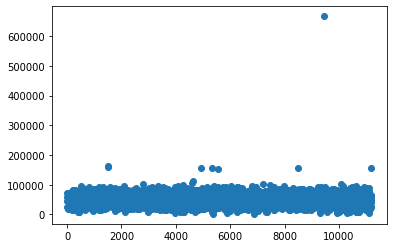

In [21]:
plt.scatter(df["ID"],df["Income"])

In [22]:
df=df.dropna(subset=['Income'])
df=df[df['Income']<600000]

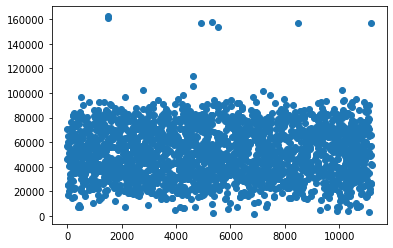

In [23]:
plt.scatter(df["ID"],df["Income"])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2215 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2215 non-null   int64  
 1   Year_Birth           2215 non-null   int64  
 2   Education            2215 non-null   object 
 3   Marital_Status       2215 non-null   object 
 4   Income               2215 non-null   float64
 5   Kidhome              2215 non-null   int64  
 6   Teenhome             2215 non-null   int64  
 7   Dt_Customer          2215 non-null   object 
 8   Recency              2215 non-null   int64  
 9   MntWines             2215 non-null   int64  
 10  MntFruits            2215 non-null   int64  
 11  MntMeatProducts      2215 non-null   int64  
 12  MntFishProducts      2215 non-null   int64  
 13  MntSweetProducts     2215 non-null   int64  
 14  MntGoldProds         2215 non-null   int64  
 15  NumDealsPurchases    2215 non-null   i

In [25]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2215 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2215 non-null   int64         
 1   Year_Birth           2215 non-null   int64         
 2   Education            2215 non-null   object        
 3   Marital_Status       2215 non-null   object        
 4   Income               2215 non-null   float64       
 5   Kidhome              2215 non-null   int64         
 6   Teenhome             2215 non-null   int64         
 7   Dt_Customer          2215 non-null   datetime64[ns]
 8   Recency              2215 non-null   int64         
 9   MntWines             2215 non-null   int64         
 10  MntFruits            2215 non-null   int64         
 11  MntMeatProducts      2215 non-null   int64         
 12  MntFishProducts      2215 non-null   int64         
 13  MntSweetProducts     2215 non-nul

In [29]:
df["Marital_Status"].value_counts()

Married     857
Together    572
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [30]:
df.describe()


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.0,2215.0,2215.000000
mean,5586.618059,1968.816704,51969.861400,0.441535,0.505643,49.024379,305.225282,26.361625,167.063205,37.651016,...,5.318736,0.073589,0.074041,0.073138,0.064108,0.013544,0.009481,3.0,11.0,0.150339
std,3249.082838,11.987000,21526.320095,0.536886,0.544198,28.949608,337.345380,39.802036,224.311559,54.760822,...,2.425863,0.261160,0.261896,0.260421,0.245001,0.115614,0.096929,0.0,0.0,0.357484
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.500000,1959.000000,35284.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5455.000000,1970.000000,51373.000000,0.000000,0.000000,49.000000,175.000000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8419.000000,1977.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.500000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [32]:
df["Age"] = 2021-df["Year_Birth"]
df = df[df["Age"]<90]

In [33]:
df.describe()


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.0,2212.0,2212.000000,2212.000000
mean,5585.160940,1968.913653,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,...,0.073689,0.074141,0.072785,0.064195,0.013562,0.009042,3.0,11.0,0.150542,52.086347
std,3247.523735,11.701599,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,...,0.261323,0.262060,0.259842,0.245156,0.115691,0.094678,0.0,0.0,0.357683,11.701599
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,25.000000
25%,2814.750000,1959.000000,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,44.000000
50%,5454.500000,1970.000000,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,51.000000
75%,8418.500000,1977.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,62.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,81.000000
